# Module 2 Numerical Integration (2 of n)


## Learning objectives

- improve the efficiency of our integration algorithms by using the trapezoid and Simpson's method
- utilize a published library to compute integrals

# Pre-class

* be ready to share your work on M2 ~~with your group~~, and discuss
* watch [Video 3.2](https://youtu.be/TzXShbDDE_o) (on log plots and exponents, will help with HW)
* read the text of this module, and be ready to ask questions and discuss the mathematics


## Group discussion: Numerical errors in integration methods 

Examine your work on previous HW problems: you should be able to observe that the errors in the left and right endpoint rules for numerical integration are proportional to $1/N$, where $N$ is the 
number of subintervals. The width of each subinterval is $h = (b-a)/N$, so we say the error in these methods "scales like" (is proportional to) $h$.

*If you don't observe this in your log-log plots .... ask an instructor ...*

Thus, if you want to reduce the error in a calculation by a factor of $10^6$, you must increase the number of subintervals 
by a factor of $10^6$. This requires $10^6$ times as many evaluations of the integrand $f(x)$. This might be fine for simple problems, 
with simple integrands. 
But for complicated integrands that require a lot of computer time to evaluate, this can be a problem. In those cases 
we need a more efficient integration scheme. 

The midpoint rule is better than the left or right endpoint rules; the errors in this method are proportional to $1/N^2$, 
or $h^2$. With the midpoint rule we can reduce the error by a factor of $10^6$ by increasing the number of subintervals 
by a factor of $1000$. This requires "only" $1000$ times as many evaluations of $f(x)$. 

Today, we'll find out: *can we do even better?* and what are the pros/cons of the different methods?



## Trapezoid rule

The errors for the left endpoint rule and the right endpoint rule are similar. To be precise, 
the order $h^2$ terms are the same apart from the overall sign, and the point of evaluation of $f''(x)$. The point of evaluation should 
not make much difference, assuming $h$ is small. This suggests that the errors in the left and right endpoint rules should be
approximately equal in magnitude but opposite in sign.  You might have noticed this from working with the 
left and right endpoint rules in the previous lesson. 

This observation leads us to the trapezoid rule for numerical integration. The trapezoid rule is obtained by 
taking the _average_ of the left and right endpoint rules. That is, we approximate the integral 

$$
	I = \int_a^b f(x)\,dx
$$

by 

$$
	I_T = \frac{1}{2} \left( I_L + I_R\right) = \sum_{i=0}^{N-1} \frac{1}{2} \left[ f(a + ih) + f(a + ih + h) \right] h
$$

![Integration trapezoids](https://upload.wikimedia.org/wikipedia/commons/a/a8/Calkowanie_numeryczne-metoda_trapezow.png)

Geometrically, the area for each subinterval is approximated as the area of a trapezoid that touches the curve $f(x)$ at both 
endpoints. Note that the trapezoid rule can be rearranged in this way:

$$
	I_T = \frac{h}{2}\left[ f(a) + f(b)\right] + \sum_{i=1}^{N-1} f(a+ih) h
$$

This result is important because it shows that the trapezoid rule requires only $N+1$ evaluations of the function $f(x)$. This is essentially the same as the number of evaluations required for the left endpoint, right endpoint, and midpoint rules, 
namely $N$. 

**Note:** In the second version, can you see how the $i=0$ and $i=N-1$ contributions to the sum are moved out of the sum? 




## Homework 3.3 ($\LaTeX{}$)

Consider the integral

$$
	I = \int_{-1}^1 \cos(x^2 - x) \, dx
$$

For the left endpoint rule, midpoint rule, and trapezoid rule, find (approximately) the number 
of subintervals required to achieve an error of about $\pm 10^{-4}$. In each case, how many function evaluations 
are required? 

         N  Leftpoint Riemann
0      1.0          -0.832294
1      2.0           0.583853
2      3.0           1.641409
3      4.0           1.142227
4      5.0           1.234911
..     ...                ...
595  596.0           1.553092
596  597.0           1.556446
597  598.0           1.556444
598  599.0           1.556442
599  600.0           1.556441

[600 rows x 2 columns]
         N  Leftpoint Riemann
582  583.0           1.556469
584  585.0           1.556466
589  590.0           1.556457
593  594.0           1.556451
594  595.0           1.556449
596  597.0           1.556446
597  598.0           1.556444
598  599.0           1.556442
599  600.0           1.556441


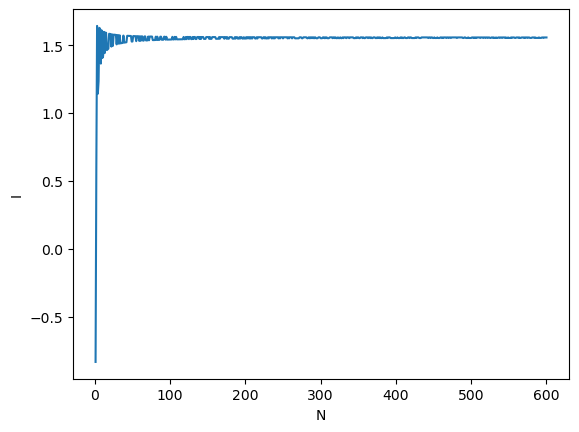

       N  Midpoint Riemann
0    1.0          2.000000
1    2.0          1.700601
2    3.0          1.612717
3    4.0          1.585974
4    5.0          1.574498
5    6.0          1.568501
6    7.0          1.564964
7    8.0          1.562700
8    9.0          1.561161
9   10.0          1.560068
10  11.0          1.559262
11  12.0          1.558652
12  13.0          1.558178
13  14.0          1.557803
14  15.0          1.557501
15  16.0          1.557254
16  17.0          1.557049
17  18.0          1.556878
18  19.0          1.556733
19  20.0          1.556610
20  21.0          1.556504
21  22.0          1.556412
22  23.0          1.556331
23  24.0          1.556261
24  25.0          1.556199
25  26.0          1.556144
26  27.0          1.556095
27  28.0          1.556051
28  29.0          1.556011
29  30.0          1.555976
30  31.0          1.555944
31  32.0          1.555915
32  33.0          1.555888
33  34.0          1.555864
34  35.0          1.555842
35  36.0          1.555821
3

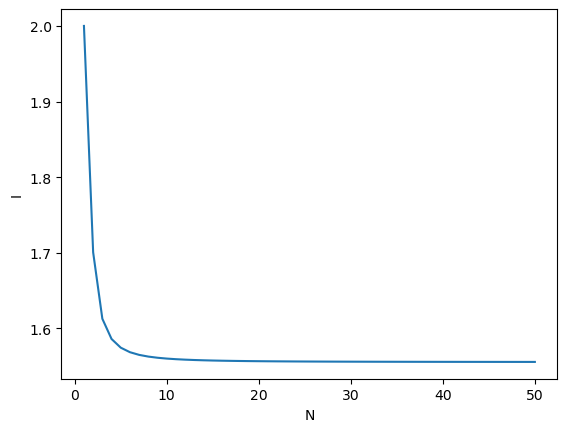

       N  Trapezoid Riemann
0    1.0           0.583853
1    2.0           1.291927
2    3.0           1.446791
3    4.0           1.496264
4    5.0           1.518140
5    6.0           1.529754
6    7.0           1.536668
7    8.0           1.541119
8    9.0           1.544155
9   10.0           1.546319
10  11.0           1.547915
11  12.0           1.549128
12  13.0           1.550069
13  14.0           1.550816
14  15.0           1.551417
15  16.0           1.551909
16  17.0           1.552317
17  18.0           1.552658
18  19.0           1.552947
19  20.0           1.553193
20  21.0           1.553405
21  22.0           1.553589
22  23.0           1.553749
23  24.0           1.553890
24  25.0           1.554014
25  26.0           1.554124
26  27.0           1.554222
27  28.0           1.554309
28  29.0           1.554388
29  30.0           1.554459
30  31.0           1.554523
31  32.0           1.554582
32  33.0           1.554635
33  34.0           1.554683
34  35.0           1

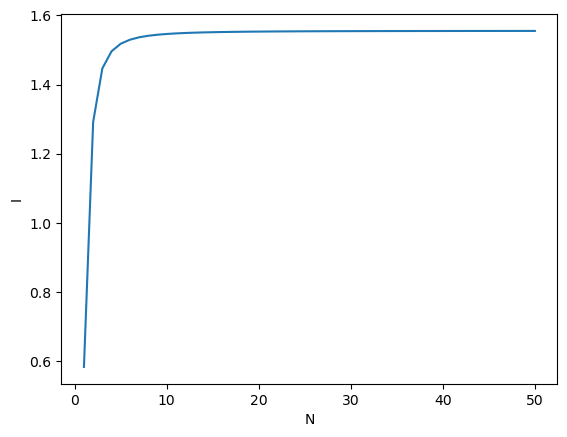

In [9]:
correct_value=1.555470165097609
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pylab as py


def leftpoint(f,a,b,N):
    h = (b-a)/N #calculate width of box
    x = a #set starting left point as 0
    Sum = 0 #start sum as 0
    while x < b:
        Sum += f(x)*h #add area
        x += h #move left point

    return Sum   # Note that we need this to tell the code outside of the function about the result

def midpoint(f,a,b,N):
    h = (b-a)/N #calculate width of box
    x = a+h/2 #set starting mid point as halfway through a rectangle
    Sum = 0 #start sum as 0
    while x < b:
        Sum += f(x)*h #add area
        x += h #move left point
    return Sum

def rightpoint(f,a,b,N):
    h = (b-a)/N #calculate width of box
    x = h #set starting right point as h
    Sum = 0 #start sum as 0
    while x <= b:
        Sum+=f(x)*h #add area
        x+=h #move right point

    return Sum   # Note that we need this to tell the code outside of the function about the result
    
def trapezoid(f,a,b,N):
    h = (b-a)/N
    Sum= 0
    Sum+=(h/2)*(f(a)+f(b))
    i=1
    while i <= N-1:
        Sum+=(h*f(a+i*h))
        i+=1
    return Sum
        
def function(x):
    #return(np.sin(x**2))
    return(np.cos(x**2-x)) 


SigFig = 0.001
f,a,b=function,-1,1


NlistL = np.zeros(600)
anslist_L = np.zeros(600)
for i in range(600):
    N=i+1
    NlistL[i]=N
    anslist_L[i] = leftpoint(f,a,b,N)
valuesL = {'N': NlistL, 'Leftpoint Riemann': anslist_L}
dfL = pd.DataFrame(valuesL)

df2L=dfL[abs(correct_value-dfL['Leftpoint Riemann']) < SigFig]

print(dfL)
print(df2L)
py.plot(NlistL, anslist_L)
py.xlabel('N')
py.ylabel('I')
py.show()



NlistM = np.zeros(50)
anslist_M = np.zeros(50)
for i in range(50):
    N=i+1
    NlistM[i]=N
    anslist_M[i] = midpoint(f,a,b,N)
valuesM = {'N': NlistM, 'Midpoint Riemann': anslist_M}
dfM = pd.DataFrame(valuesM)

df2M=dfM[abs(correct_value-dfM['Midpoint Riemann']) < SigFig]

print(dfM)
print(df2M)
py.plot(NlistM, anslist_M,'-')
py.xlabel('N')
py.ylabel('I')
py.show()


NlistT = np.zeros(50)
anslist_T = np.zeros(50)
for i in range(50):
    N=i+1
    NlistT[i]=N
    anslist_T[i] = trapezoid(f,a,b,N)
valuesT = {'N': NlistT, 'Trapezoid Riemann': anslist_T}
dfT = pd.DataFrame(valuesT)

df2T=dfT[abs(correct_value-dfT['Trapezoid Riemann']) < SigFig]

print(dfT)
print(df2T)
py.plot(NlistT, anslist_T,'-')
py.xlabel('N')
py.ylabel('I')
py.show()

Leftpoint N: 595
    Calls f 595
Midpoint N: 22
    Calls f: 22
Trapezoid N: 31
    Calls f: 32

## Simpson's Rule

We have now identified two integration methods with errors (per subinterval) of order $h^3$. The midpoint rule has error 
${\cal E}_M$ in each subinterval. The trapezoid rule has error ${\cal E}_T$
in each subinterval. 
Some math would show that to leading order, ${\cal E}_T = -2{\cal E}_M$. This suggests 
that we can define a new integration method as a weighted sum of the midpoint and trapezoid rules, designed 
to cancel the order $h^3$ terms in the error. This leads to *Simpson's rule*:

$$
	I_S = \frac{1}{3} I_T + \frac{2}{3} I_M
$$

which can be written explicitly as

$$
	I_S = \frac{h}{6}\left\{ f(a) + f(b) + 2\sum_{i=1}^{N-1} f(a + ih) + 4\sum_{i=1}^N f(a+ih - h/2) \right\}
$$

Note that for implementation purposes, you could simply call the trapezoid and midpoint functions you've already written.

For Simpson's rule, the errors of order $h^3$ from the midpoint and trapezoid rules cancel. A complete analysis 
shows that the order $h^4$ terms in the error actually vanish as well. The leading non--zero term in the error is proportional 
to $h^5$. That is, for Simpson's rule, the error in each 
subinterval is order $h^5$. The total error for $N\sim 1/h$ subintervals 
is proportional to $Nh^5 \sim h^4$. 

Geometrically, Simpson's rule is obtained by approximating the area in each subinterval as the area under 
a parabola that matches the function $f(x)$ at each endpoint and at the midpoint. 
Simpson's rule is more efficient than any of the other integration methods we have discussed. If we want to reduce 
the error by a factor of $10^6$, we must increase the number of subintervals by a factor of 
$10^{6/4}\approx 32$. Note that Simpson's rule requires $2N + 1$ function evaluations. This is roughly twice as 
many evaluations as our other methods. However, the rapid reduction of error with a relatively small increase in $N$ 
will usually offset the extra function calls.  

# Homework

The error function is defined by 

$$
	{\rm erf}(x) \equiv \frac{2}{\sqrt{\pi}} \int_0^x e^{-t^2} dt
$$

### a) Write a function `SimpErf` to evaluate the error function using Simpson's rule

- Input: x
- Output: the right hand side of the equation above

Hint: for each value $0 \le x \le 3$,  you will need to evaluate the integral over $t$.

In [61]:
def Erf(t):
    return(2/np.sqrt(np.pi)*np.exp(-t**2))
    
def SimpErf(x,N):
    f,a,b=Erf,0,x
    I=1/3*trapezoid(f,a,b,N)+2/3*midpoint(f,a,b,N)
    return(I)


### b) Make a labelled plot of ${\rm erf}(x)$ versus $x$ for $0 \le x \le 3$.

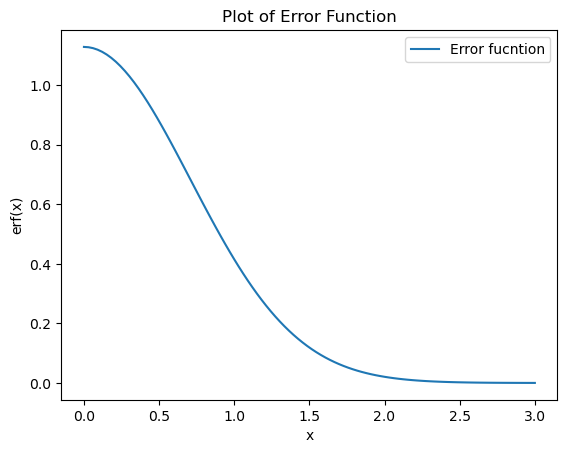

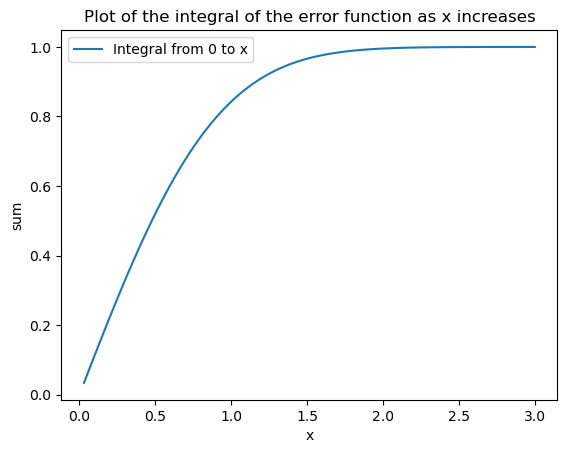

In [59]:
x=np.linspace(0, 3, 100)
y=Erf(x)

plt.plot(x, y, label='Error fucntion')
plt.xlabel('x')
plt.ylabel('erf(x)')
plt.title('Plot of Error Function')
plt.legend()
plt.show()

#below section creates a plot of int(erf(x)) vs x. I did this first because I mis read the question
Count=100
Max = 3
Width = Max/Count
N=1000
Xlist = np.zeros(Count)
erf = np.zeros(Count)

for i in range(Count):
    Xlist[i]=Width*(i+1)
    erf[i] = SimpErf(Xlist[i],N)
valuesErf = {'X': Xlist, 'erf(x)': erf}
dfS = pd.DataFrame(valuesErf)
plt.plot(Xlist, erf, label='Integral from 0 to x')
plt.xlabel('x')
plt.ylabel('sum')
plt.title('Plot of the integral of the error function as x increases')
plt.legend()
plt.show()


### c) Using `scipy.integrate`

Fortunately, people have been working on numerical integration for a long time and have several more advanced methods.  Often, it's not worth reinventing the wheel, and it's better to simply call an already written _library_ function.  In scipy, we can use the `quad` function for this -- it's found in the `scipy.integrate` module.

- https://docs.scipy.org/doc/scipy/reference/integrate.html
- https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.quad.html#scipy.integrate.quad

In the simplest form, it takes a function and the limits as arguments:

    from scipy.integrate import quad

    answer = quad(f, a, b)
    
`a` and `b` are numbers, and `f` is a function (either one that you define, or one that is already defined. It returns the answer, and an estimate of what the error in the answer is.

Define two functions: function `Sq` that returns the square of input $x$ and function `SqInt` that computes the integral of $x^2$ from $a$ to $b$ using the `Sq` and the `quad` function. This problem will be autograded by nbgrader.

**Bonus Challenge:** can you make it so that each function has only a `def` line and a `return` line?

In [81]:
from scipy.integrate import quad

def SimpErf(f,x,N):
    a,b=0,x
    I=1/3*trapezoid(f,a,b,N)+2/3*midpoint(f,a,b,N)
    return(I)

def Sq(x):
    return(x*x)

def SqInt(a,b):
    return(quad(Sq,a,b))
    
print(SqInt(0,1))
print(quad(Sq,0,1))
print(SimpErf(Sq,1,10))

(0.33333333333333337, 3.700743415417189e-15)
(0.33333333333333337, 3.700743415417189e-15)
0.3333333333333333
